#  Generación de Modelos con Clusterización - Mes, Codigo Laboralidad

Este notebook va a generar unos ficheros .csv utilizando la generación de modelos por mes y código de laboralidad. 

Dataset Entrenamiento:
- 1) Dividir anual_data en 12 datasets --> mensual_data(1...12) // 12 meses en 1 año
- 2) Particionar mensual_data por segmento --> mensual_data_seg(1...N) // N es el numero total de segmentos
- 3) Particionar por dias con mismo código de lab --> 


Esquema .csv resultado: ID_SEGMENT | Mes | Cod | HH:MM:SS | REF_ARIMA .... X (Model)

## Lectura de datos

In [4]:
import pandas as pd
anual_data = pd.read_csv('C:\\Users\\yhoz\\Documents\\dataanalytics.predictive\\data\\ausol\\datasets\\anual_data_2018.csv', delimiter=";")

### Take only attributes of interest
#### 'ID_SEGMENT','COD_LABORALIDAD','FECHA','MES','HORA','MINUTO','CANTIDAD_PREC'

In [5]:
anual_data = anual_data[['TOTAL_VEHICULOS','ID_SEGMENT','COD_LABORALIDAD','FECHA','MES','HORA','MINUTO','CANTIDAD_PREC']]
df_anual_data = anual_data

### Apply some type convertions

In [6]:
from datetime import datetime, timedelta
df_anual_data['FECHA'] = pd.to_datetime(df_anual_data['FECHA'])
df_anual_data['TIME'] = pd.to_datetime(df_anual_data['FECHA']).map(lambda x: x.strftime('%H:%M:%S'))
df_anual_data.TIME[:5]

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: TIME, dtype: object

In [7]:
df_anual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390512 entries, 0 to 1390511
Data columns (total 9 columns):
TOTAL_VEHICULOS    1004224 non-null float64
ID_SEGMENT         1390512 non-null int64
COD_LABORALIDAD    1390512 non-null int64
FECHA              1390512 non-null datetime64[ns]
MES                1390512 non-null int64
HORA               1390512 non-null int64
MINUTO             1390512 non-null int64
CANTIDAD_PREC      1390512 non-null int64
TIME               1390512 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 95.5+ MB


## Generate Training Datasets

In [8]:
# Check the number of training sets to be generated

months = df_anual_data.FECHA.dt.month.unique()
segments = df_anual_data.ID_SEGMENT.unique()
codes = df_anual_data.COD_LABORALIDAD.unique()

print("Months " + str(months))
print("Segments " + str(segments))
print("Codes " + str(codes))

total_trainsets = len(months) * len(segments) * len(codes)
print("Number of training sets: " + str(total_trainsets))

Months [ 1  2  3  4  5  6  7  8  9 10 11 12]
Segments [  1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  30  31  32  33  34  35  39  40  42  43 100 101 102 103 104
 105 106 107]
Codes [4 3 1 2 6 5]
Number of training sets: 2808


In [9]:
# Fill the training_sets dict

rows_per_day=int(((60/15)*24))

training_sets = {'ID_SEGMENT':[], 'MES':[], 'COD_LABORALIDAD':[], 'TRAINING_SET':[] }
for seg_id in segments: # 1) Particionar anual_data por segmento
    df_seg = df_anual_data.loc[df_anual_data.ID_SEGMENT==seg_id]
    for month_i in df_seg.FECHA.dt.month.unique(): # 2) Dividir mensual_data en 12 datasets 
        df_month_seg = df_seg.loc[df_seg.FECHA.dt.month==month_i]
        for code_i in df_month_seg.COD_LABORALIDAD.unique(): # 3) Particionar por dias con mismo código de lab
            df_month_seg_code = df_month_seg.loc[df_month_seg.COD_LABORALIDAD==code_i]
                
            # Fill training_sets dictionary
            
            training_sets['ID_SEGMENT'].append(seg_id)
            training_sets['MES'].append(month_i)
            training_sets['COD_LABORALIDAD'].append(code_i)
            training_sets['TRAINING_SET'].append(df_month_seg_code)
            

In [11]:
# Check that all training_sets have been generated correctly

for row in range(0,total_trainsets):
    print("----------------------------> TRAINING SET NUMBER: " + str(row))
    print("SEGMENTO " + str(training_sets['ID_SEGMENT'][row]))
    print("MES " + str(training_sets['MES'][row]))
    print("COD_LABORALIDAD " + str(training_sets['COD_LABORALIDAD'][row]))
    print("DAYS IN TRAINING_SET: " + str(training_sets['TRAINING_SET'][row].FECHA.dt.day.unique()))

----------------------------> TRAINING SET NUMBER: 0
SEGMENTO 1
MES 1
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1]
----------------------------> TRAINING SET NUMBER: 1
SEGMENTO 1
MES 1
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [28 20 21 13 27  6  7 14]
----------------------------> TRAINING SET NUMBER: 2
SEGMENTO 1
MES 1
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [16 18 31 25  9 11 29 10 17 22 23  2  3 24  4 30  8 15]
----------------------------> TRAINING SET NUMBER: 3
SEGMENTO 1
MES 1
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [12 19 26  5]
----------------------------> TRAINING SET NUMBER: 4
SEGMENTO 1
MES 2
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1  6 13 26 27  5  7 12 14 15  8 19 20 21 22]
----------------------------> TRAINING SET NUMBER: 5
SEGMENTO 1
MES 2
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [24  4 11 25 10 28  3 17 18]
----------------------------> TRAINING SET NUMBER: 6
SEGMENTO 1
MES 2
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 9  2 16 23]
----------------------------> TRAINING S

DAYS IN TRAINING_SET: [23 24  9 10 30 16 17  2  3]
----------------------------> TRAINING SET NUMBER: 81
SEGMENTO 2
MES 7
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1 15 21 22  7  8 28 29 14]
----------------------------> TRAINING SET NUMBER: 82
SEGMENTO 2
MES 7
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [16 17 18 19  2  3  4 23  5 24 25 26  9 30 10 31 11 12]
----------------------------> TRAINING SET NUMBER: 83
SEGMENTO 2
MES 7
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [20  6 27 13]
----------------------------> TRAINING SET NUMBER: 84
SEGMENTO 2
MES 8
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1 27 16 28  2 29  6  7 30  8 21  9 22 23 13 14]
----------------------------> TRAINING SET NUMBER: 85
SEGMENTO 2
MES 8
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [26  4  5 11 12 25 15]
----------------------------> TRAINING SET NUMBER: 86
SEGMENTO 2
MES 8
COD_LABORALIDAD 6
DAYS IN TRAINING_SET: [17]
----------------------------> TRAINING SET NUMBER: 87
SEGMENTO 2
MES 8
COD_LABORALIDAD 4
DAYS IN TRAINING_

DAYS IN TRAINING_SET: [16 18 31 25  9 11 29 10 17 22 23  2  3 24  4 30  8 15]
----------------------------> TRAINING SET NUMBER: 168
SEGMENTO 4
MES 1
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [12 19 26  5]
----------------------------> TRAINING SET NUMBER: 169
SEGMENTO 4
MES 2
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1  6 13 26 27  5  7 12 14 15  8 19 20 21 22]
----------------------------> TRAINING SET NUMBER: 170
SEGMENTO 4
MES 2
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [24  4 11 25 10 28  3 17 18]
----------------------------> TRAINING SET NUMBER: 171
SEGMENTO 4
MES 2
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 9  2 16 23]
----------------------------> TRAINING SET NUMBER: 172
SEGMENTO 4
MES 3
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1 26  5  6 27  7  8 19 20 21 22 12 13 14 15]
----------------------------> TRAINING SET NUMBER: 173
SEGMENTO 4
MES 3
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 4 17 18 10 11 24 25  3]
----------------------------> TRAINING SET NUMBER: 174
SEGMENTO 4
MES 3
C

DAYS IN TRAINING_SET: [11 31]
----------------------------> TRAINING SET NUMBER: 263
SEGMENTO 6
MES 10
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [13]
----------------------------> TRAINING SET NUMBER: 264
SEGMENTO 6
MES 11
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1 4]
----------------------------> TRAINING SET NUMBER: 265
SEGMENTO 6
MES 11
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [25 24 17 18 10 11]
----------------------------> TRAINING SET NUMBER: 266
SEGMENTO 6
MES 11
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [3 2]
----------------------------> TRAINING SET NUMBER: 267
SEGMENTO 6
MES 11
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [20 21 14 26  5 15 22 27  6 28  7  8 29 12 19 13]
----------------------------> TRAINING SET NUMBER: 268
SEGMENTO 6
MES 11
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [23 16  9 30]
----------------------------> TRAINING SET NUMBER: 269
SEGMENTO 6
MES 12
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1 15  2 16]
----------------------------> TRAINING SET NUMBER: 270
SEGMENTO 

MES 8
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [19]
----------------------------> TRAINING SET NUMBER: 364
SEGMENTO 8
MES 8
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 3 31 10 24]
----------------------------> TRAINING SET NUMBER: 365
SEGMENTO 8
MES 9
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1  9 15 16 22 23  2 29 30  8]
----------------------------> TRAINING SET NUMBER: 366
SEGMENTO 8
MES 9
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [10 11 12 13 17 18 19 20 24 25 26 27  3  4  5  6]
----------------------------> TRAINING SET NUMBER: 367
SEGMENTO 8
MES 9
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [14 21 28  7]
----------------------------> TRAINING SET NUMBER: 368
SEGMENTO 8
MES 10
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1 25  8  9  2  3 15 10 16  4 22 17 29 30 23 18 24]
----------------------------> TRAINING SET NUMBER: 369
SEGMENTO 8
MES 10
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [14 12]
----------------------------> TRAINING SET NUMBER: 370
SEGMENTO 8
MES 10
COD_LABORALIDAD 2
DAYS IN TRAIN

DAYS IN TRAINING_SET: [24  4 11 25 10 28  3 17 18]
----------------------------> TRAINING SET NUMBER: 446
SEGMENTO 10
MES 2
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 9  2 16 23]
----------------------------> TRAINING SET NUMBER: 447
SEGMENTO 10
MES 3
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1 26  5  6 27  7  8 19 20 21 22 12 13 14 15]
----------------------------> TRAINING SET NUMBER: 448
SEGMENTO 10
MES 3
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 4 17 18 10 11 24 25  3]
----------------------------> TRAINING SET NUMBER: 449
SEGMENTO 10
MES 3
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 9 23 16  2]
----------------------------> TRAINING SET NUMBER: 450
SEGMENTO 10
MES 3
COD_LABORALIDAD 6
DAYS IN TRAINING_SET: [28]
----------------------------> TRAINING SET NUMBER: 451
SEGMENTO 10
MES 3
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [29]
----------------------------> TRAINING SET NUMBER: 452
SEGMENTO 10
MES 3
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [30 31]
----------------------------> TRAINING 

DAYS IN TRAINING_SET: [1]
----------------------------> TRAINING SET NUMBER: 551
SEGMENTO 12
MES 1
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [28 20 21 13 27  6  7 14]
----------------------------> TRAINING SET NUMBER: 552
SEGMENTO 12
MES 1
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [16 18 31 25  9 11 29 10 17 22 23  2  3 24  4 30  8 15]
----------------------------> TRAINING SET NUMBER: 553
SEGMENTO 12
MES 1
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [12 19 26  5]
----------------------------> TRAINING SET NUMBER: 554
SEGMENTO 12
MES 2
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1  6 13 26 27  5  7 12 14 15  8 19 20 21 22]
----------------------------> TRAINING SET NUMBER: 555
SEGMENTO 12
MES 2
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [24  4 11 25 10 28  3 17 18]
----------------------------> TRAINING SET NUMBER: 556
SEGMENTO 12
MES 2
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 9  2 16 23]
----------------------------> TRAINING SET NUMBER: 557
SEGMENTO 12
MES 3
COD_LABORALIDAD 1
DAYS IN TRAINING_SE

DAYS IN TRAINING_SET: [ 1 25  8  9  2  3 15 10 16  4 22 17 29 30 23 18 24]
----------------------------> TRAINING SET NUMBER: 644
SEGMENTO 13
MES 10
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [14 12]
----------------------------> TRAINING SET NUMBER: 645
SEGMENTO 13
MES 10
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [19 26  5]
----------------------------> TRAINING SET NUMBER: 646
SEGMENTO 13
MES 10
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [20 21 27 28  6  7]
----------------------------> TRAINING SET NUMBER: 647
SEGMENTO 13
MES 10
COD_LABORALIDAD 6
DAYS IN TRAINING_SET: [11 31]
----------------------------> TRAINING SET NUMBER: 648
SEGMENTO 13
MES 10
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [13]
----------------------------> TRAINING SET NUMBER: 649
SEGMENTO 13
MES 11
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1 4]
----------------------------> TRAINING SET NUMBER: 650
SEGMENTO 13
MES 11
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [25 24 17 18 10 11]
----------------------------> TRAINING SET NUMBER

COD_LABORALIDAD 6
DAYS IN TRAINING_SET: [28]
----------------------------> TRAINING SET NUMBER: 726
SEGMENTO 15
MES 3
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [29]
----------------------------> TRAINING SET NUMBER: 727
SEGMENTO 15
MES 3
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [30 31]
----------------------------> TRAINING SET NUMBER: 728
SEGMENTO 15
MES 4
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [ 1 28]
----------------------------> TRAINING SET NUMBER: 729
SEGMENTO 15
MES 4
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [17 18 19  2  3  4 23 24  5 25 26  9 10 11 12 16]
----------------------------> TRAINING SET NUMBER: 730
SEGMENTO 15
MES 4
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [20  6 13]
----------------------------> TRAINING SET NUMBER: 731
SEGMENTO 15
MES 4
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [21 22  7  8 14 15]
----------------------------> TRAINING SET NUMBER: 732
SEGMENTO 15
MES 4
COD_LABORALIDAD 6
DAYS IN TRAINING_SET: [27]
----------------------------> TRAINING SET NUMBER: 733
SE

DAYS IN TRAINING_SET: [21 28  5]
----------------------------> TRAINING SET NUMBER: 824
SEGMENTO 16
MES 12
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [14]
----------------------------> TRAINING SET NUMBER: 825
SEGMENTO 17
MES 1
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1]
----------------------------> TRAINING SET NUMBER: 826
SEGMENTO 17
MES 1
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [28 20 21 13 27  6  7 14]
----------------------------> TRAINING SET NUMBER: 827
SEGMENTO 17
MES 1
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [16 18 31 25  9 11 29 10 17 22 23  2  3 24  4 30  8 15]
----------------------------> TRAINING SET NUMBER: 828
SEGMENTO 17
MES 1
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [12 19 26  5]
----------------------------> TRAINING SET NUMBER: 829
SEGMENTO 17
MES 2
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1  6 13 26 27  5  7 12 14 15  8 19 20 21 22]
----------------------------> TRAINING SET NUMBER: 830
SEGMENTO 17
MES 2
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [24  4 11 25 10 28  3 1

DAYS IN TRAINING_SET: [18 20]
----------------------------> TRAINING SET NUMBER: 913
SEGMENTO 18
MES 8
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [19]
----------------------------> TRAINING SET NUMBER: 914
SEGMENTO 18
MES 8
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 3 31 10 24]
----------------------------> TRAINING SET NUMBER: 915
SEGMENTO 18
MES 9
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1  9 15 16 22 23  2 29 30  8]
----------------------------> TRAINING SET NUMBER: 916
SEGMENTO 18
MES 9
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [10 11 12 13 17 18 19 20 24 25 26 27  3  4  5  6]
----------------------------> TRAINING SET NUMBER: 917
SEGMENTO 18
MES 9
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [14 21 28  7]
----------------------------> TRAINING SET NUMBER: 918
SEGMENTO 18
MES 10
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1 25  8  9  2  3 15 10 16  4 22 17 29 30 23 18 24]
----------------------------> TRAINING SET NUMBER: 919
SEGMENTO 18
MES 10
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [14 12]
-

DAYS IN TRAINING_SET: [17 18 19  2  3  4 23 24  5 25 26  9 10 11 12 16]
----------------------------> TRAINING SET NUMBER: 1005
SEGMENTO 20
MES 4
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [20  6 13]
----------------------------> TRAINING SET NUMBER: 1006
SEGMENTO 20
MES 4
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [21 22  7  8 14 15]
----------------------------> TRAINING SET NUMBER: 1007
SEGMENTO 20
MES 4
COD_LABORALIDAD 6
DAYS IN TRAINING_SET: [27]
----------------------------> TRAINING SET NUMBER: 1008
SEGMENTO 20
MES 4
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [29 30]
----------------------------> TRAINING SET NUMBER: 1009
SEGMENTO 20
MES 5
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1]
----------------------------> TRAINING SET NUMBER: 1010
SEGMENTO 20
MES 5
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [23 16 31  8 24 17  9  2 10  3 28 21 29 22 30 14  7 15]
----------------------------> TRAINING SET NUMBER: 1011
SEGMENTO 20
MES 5
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [25 18 11  4]
------------

DAYS IN TRAINING_SET: [23 16  9 30]
----------------------------> TRAINING SET NUMBER: 1094
SEGMENTO 21
MES 12
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1 15  2 16]
----------------------------> TRAINING SET NUMBER: 1095
SEGMENTO 21
MES 12
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [29 25  6  9 22]
----------------------------> TRAINING SET NUMBER: 1096
SEGMENTO 21
MES 12
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [10 27 12 17  4 19 13 11 26 18  3 20]
----------------------------> TRAINING SET NUMBER: 1097
SEGMENTO 21
MES 12
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [23 31  8 30  7 24]
----------------------------> TRAINING SET NUMBER: 1098
SEGMENTO 21
MES 12
COD_LABORALIDAD 6
DAYS IN TRAINING_SET: [21 28  5]
----------------------------> TRAINING SET NUMBER: 1099
SEGMENTO 21
MES 12
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [14]
----------------------------> TRAINING SET NUMBER: 1100
SEGMENTO 22
MES 1
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1]
----------------------------> TRAINING SET NUMBER: 

DAYS IN TRAINING_SET: [ 4 21  5  6  7 25 26 27 11 28 12 13 14 18 19 20]
----------------------------> TRAINING SET NUMBER: 1180
SEGMENTO 30
MES 6
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [23 24  9 10 30 16 17  2  3]
----------------------------> TRAINING SET NUMBER: 1181
SEGMENTO 30
MES 7
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1 15 21 22  7  8 28 29 14]
----------------------------> TRAINING SET NUMBER: 1182
SEGMENTO 30
MES 7
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [16 17 18 19  2  3  4 23  5 24 25 26  9 30 10 31 11 12]
----------------------------> TRAINING SET NUMBER: 1183
SEGMENTO 30
MES 7
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [20  6 27 13]
----------------------------> TRAINING SET NUMBER: 1184
SEGMENTO 30
MES 8
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1 27 16 28  2 29  6  7 30  8 21  9 22 23 13 14]
----------------------------> TRAINING SET NUMBER: 1185
SEGMENTO 30
MES 8
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [26  4  5 11 12 25 15]
----------------------------> TRAINING SET 

DAYS IN TRAINING_SET: [11 31]
----------------------------> TRAINING SET NUMBER: 1253
SEGMENTO 31
MES 10
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [13]
----------------------------> TRAINING SET NUMBER: 1254
SEGMENTO 31
MES 11
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1 4]
----------------------------> TRAINING SET NUMBER: 1255
SEGMENTO 31
MES 11
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [25 24 17 18 10 11]
----------------------------> TRAINING SET NUMBER: 1256
SEGMENTO 31
MES 11
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [3 2]
----------------------------> TRAINING SET NUMBER: 1257
SEGMENTO 31
MES 11
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [20 21 14 26  5 15 22 27  6 28  7  8 29 12 19 13]
----------------------------> TRAINING SET NUMBER: 1258
SEGMENTO 31
MES 11
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [23 16  9 30]
----------------------------> TRAINING SET NUMBER: 1259
SEGMENTO 31
MES 12
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1 15  2 16]
----------------------------> TRAINING SET NUMBER:

DAYS IN TRAINING_SET: [29 30]
----------------------------> TRAINING SET NUMBER: 1339
SEGMENTO 33
MES 5
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1]
----------------------------> TRAINING SET NUMBER: 1340
SEGMENTO 33
MES 5
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [23 16 31  8 24 17  9  2 10  3 28 21 29 22 30 14  7 15]
----------------------------> TRAINING SET NUMBER: 1341
SEGMENTO 33
MES 5
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [25 18 11  4]
----------------------------> TRAINING SET NUMBER: 1342
SEGMENTO 33
MES 5
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [26 27 19 12 20 13  5  6]
----------------------------> TRAINING SET NUMBER: 1343
SEGMENTO 33
MES 6
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 1 22  8 29 15]
----------------------------> TRAINING SET NUMBER: 1344
SEGMENTO 33
MES 6
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 4 21  5  6  7 25 26 27 11 28 12 13 14 18 19 20]
----------------------------> TRAINING SET NUMBER: 1345
SEGMENTO 33
MES 6
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [23 2

DAYS IN TRAINING_SET: [28]
----------------------------> TRAINING SET NUMBER: 1441
SEGMENTO 35
MES 3
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [29]
----------------------------> TRAINING SET NUMBER: 1442
SEGMENTO 35
MES 3
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [30 31]
----------------------------> TRAINING SET NUMBER: 1443
SEGMENTO 35
MES 4
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [ 1 28]
----------------------------> TRAINING SET NUMBER: 1444
SEGMENTO 35
MES 4
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [17 18 19  2  3  4 23 24  5 25 26  9 10 11 12 16]
----------------------------> TRAINING SET NUMBER: 1445
SEGMENTO 35
MES 4
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [20  6 13]
----------------------------> TRAINING SET NUMBER: 1446
SEGMENTO 35
MES 4
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [21 22  7  8 14 15]
----------------------------> TRAINING SET NUMBER: 1447
SEGMENTO 35
MES 4
COD_LABORALIDAD 6
DAYS IN TRAINING_SET: [27]
----------------------------> TRAINING SET NUMBER: 1448
SEGMENTO 35


----------------------------> TRAINING SET NUMBER: 1537
SEGMENTO 39
MES 12
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [23 31  8 30  7 24]
----------------------------> TRAINING SET NUMBER: 1538
SEGMENTO 39
MES 12
COD_LABORALIDAD 6
DAYS IN TRAINING_SET: [21 28  5]
----------------------------> TRAINING SET NUMBER: 1539
SEGMENTO 39
MES 12
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [14]
----------------------------> TRAINING SET NUMBER: 1540
SEGMENTO 40
MES 1
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1]
----------------------------> TRAINING SET NUMBER: 1541
SEGMENTO 40
MES 1
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [28 20 21 13 27  6  7 14]
----------------------------> TRAINING SET NUMBER: 1542
SEGMENTO 40
MES 1
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [16 18 31 25  9 11 29 10 17 22 23  2  3 24  4 30  8 15]
----------------------------> TRAINING SET NUMBER: 1543
SEGMENTO 40
MES 1
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [12 19 26  5]
----------------------------> TRAINING SET NUMBER: 1544
SEGMENT

SEGMENTO 42
MES 8
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1 27 16 28  2 29  6  7 30  8 21  9 22 23 13 14]
----------------------------> TRAINING SET NUMBER: 1625
SEGMENTO 42
MES 8
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [26  4  5 11 12 25 15]
----------------------------> TRAINING SET NUMBER: 1626
SEGMENTO 42
MES 8
COD_LABORALIDAD 6
DAYS IN TRAINING_SET: [17]
----------------------------> TRAINING SET NUMBER: 1627
SEGMENTO 42
MES 8
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [18 20]
----------------------------> TRAINING SET NUMBER: 1628
SEGMENTO 42
MES 8
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [19]
----------------------------> TRAINING SET NUMBER: 1629
SEGMENTO 42
MES 8
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 3 31 10 24]
----------------------------> TRAINING SET NUMBER: 1630
SEGMENTO 42
MES 9
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1  9 15 16 22 23  2 29 30  8]
----------------------------> TRAINING SET NUMBER: 1631
SEGMENTO 42
MES 9
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [10 11 

----------------------------> TRAINING SET NUMBER: 1704
SEGMENTO 43
MES 12
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [14]
----------------------------> TRAINING SET NUMBER: 1705
SEGMENTO 100
MES 1
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1]
----------------------------> TRAINING SET NUMBER: 1706
SEGMENTO 100
MES 1
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [28 20 21 13 27  6  7 14]
----------------------------> TRAINING SET NUMBER: 1707
SEGMENTO 100
MES 1
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [16 18 31 25  9 11 29 10 17 22 23  2  3 24  4 30  8 15]
----------------------------> TRAINING SET NUMBER: 1708
SEGMENTO 100
MES 1
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [12 19 26  5]
----------------------------> TRAINING SET NUMBER: 1709
SEGMENTO 100
MES 2
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1  6 13 26 27  5  7 12 14 15  8 19 20 21 22]
----------------------------> TRAINING SET NUMBER: 1710
SEGMENTO 100
MES 2
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [24  4 11 25 10 28  3 17 18]
--------------

COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [25 18 11  4]
----------------------------> TRAINING SET NUMBER: 1782
SEGMENTO 101
MES 5
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [26 27 19 12 20 13  5  6]
----------------------------> TRAINING SET NUMBER: 1783
SEGMENTO 101
MES 6
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 1 22  8 29 15]
----------------------------> TRAINING SET NUMBER: 1784
SEGMENTO 101
MES 6
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 4 21  5  6  7 25 26 27 11 28 12 13 14 18 19 20]
----------------------------> TRAINING SET NUMBER: 1785
SEGMENTO 101
MES 6
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [23 24  9 10 30 16 17  2  3]
----------------------------> TRAINING SET NUMBER: 1786
SEGMENTO 101
MES 7
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1 15 21 22  7  8 28 29 14]
----------------------------> TRAINING SET NUMBER: 1787
SEGMENTO 101
MES 7
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [16 17 18 19  2  3  4 23  5 24 25 26  9 30 10 31 11 12]
----------------------------> TRAINING SET NUMBER

----------------------------> TRAINING SET NUMBER: 1849
SEGMENTO 102
MES 8
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 3 31 10 24]
----------------------------> TRAINING SET NUMBER: 1850
SEGMENTO 102
MES 9
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1  9 15 16 22 23  2 29 30  8]
----------------------------> TRAINING SET NUMBER: 1851
SEGMENTO 102
MES 9
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [10 11 12 13 17 18 19 20 24 25 26 27  3  4  5  6]
----------------------------> TRAINING SET NUMBER: 1852
SEGMENTO 102
MES 9
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [14 21 28  7]
----------------------------> TRAINING SET NUMBER: 1853
SEGMENTO 102
MES 10
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1 25  8  9  2  3 15 10 16  4 22 17 29 30 23 18 24]
----------------------------> TRAINING SET NUMBER: 1854
SEGMENTO 102
MES 10
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [14 12]
----------------------------> TRAINING SET NUMBER: 1855
SEGMENTO 102
MES 10
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [19 26  5]
----------

----------------------------> TRAINING SET NUMBER: 1924
SEGMENTO 103
MES 12
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [14]
----------------------------> TRAINING SET NUMBER: 1925
SEGMENTO 104
MES 1
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1]
----------------------------> TRAINING SET NUMBER: 1926
SEGMENTO 104
MES 1
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [28 20 21 13 27  6  7 14]
----------------------------> TRAINING SET NUMBER: 1927
SEGMENTO 104
MES 1
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [16 18 31 25  9 11 29 10 17 22 23  2  3 24  4 30  8 15]
----------------------------> TRAINING SET NUMBER: 1928
SEGMENTO 104
MES 1
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [12 19 26  5]
----------------------------> TRAINING SET NUMBER: 1929
SEGMENTO 104
MES 2
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 1  6 13 26 27  5  7 12 14 15  8 19 20 21 22]
----------------------------> TRAINING SET NUMBER: 1930
SEGMENTO 104
MES 2
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [24  4 11 25 10 28  3 17 18]
-------------

MES 5
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [23 16 31  8 24 17  9  2 10  3 28 21 29 22 30 14  7 15]
----------------------------> TRAINING SET NUMBER: 2001
SEGMENTO 105
MES 5
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [25 18 11  4]
----------------------------> TRAINING SET NUMBER: 2002
SEGMENTO 105
MES 5
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [26 27 19 12 20 13  5  6]
----------------------------> TRAINING SET NUMBER: 2003
SEGMENTO 105
MES 6
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [ 1 22  8 29 15]
----------------------------> TRAINING SET NUMBER: 2004
SEGMENTO 105
MES 6
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [ 4 21  5  6  7 25 26 27 11 28 12 13 14 18 19 20]
----------------------------> TRAINING SET NUMBER: 2005
SEGMENTO 105
MES 6
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [23 24  9 10 30 16 17  2  3]
----------------------------> TRAINING SET NUMBER: 2006
SEGMENTO 105
MES 7
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1 15 21 22  7  8 28 29 14]
----------------------------> TRAINING SET 

DAYS IN TRAINING_SET: [11 31]
----------------------------> TRAINING SET NUMBER: 2078
SEGMENTO 106
MES 10
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [13]
----------------------------> TRAINING SET NUMBER: 2079
SEGMENTO 106
MES 11
COD_LABORALIDAD 4
DAYS IN TRAINING_SET: [1 4]
----------------------------> TRAINING SET NUMBER: 2080
SEGMENTO 106
MES 11
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [25 24 17 18 10 11]
----------------------------> TRAINING SET NUMBER: 2081
SEGMENTO 106
MES 11
COD_LABORALIDAD 5
DAYS IN TRAINING_SET: [3 2]
----------------------------> TRAINING SET NUMBER: 2082
SEGMENTO 106
MES 11
COD_LABORALIDAD 1
DAYS IN TRAINING_SET: [20 21 14 26  5 15 22 27  6 28  7  8 29 12 19 13]
----------------------------> TRAINING SET NUMBER: 2083
SEGMENTO 106
MES 11
COD_LABORALIDAD 2
DAYS IN TRAINING_SET: [23 16  9 30]
----------------------------> TRAINING SET NUMBER: 2084
SEGMENTO 106
MES 12
COD_LABORALIDAD 3
DAYS IN TRAINING_SET: [ 1 15  2 16]
----------------------------> TRAINING SET 

IndexError: list index out of range

In [12]:
# Convert the training_sets dict to a Pandas DataFrame  
df_training_sets = pd.DataFrame(training_sets)
df_training_sets.info() # Get number of training sets
df_training_sets['TRAINING_SET'].iloc[0].info() # Check the first training set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 4 columns):
ID_SEGMENT         2145 non-null int64
MES                2145 non-null int64
COD_LABORALIDAD    2145 non-null int64
TRAINING_SET       2145 non-null object
dtypes: int64(3), object(1)
memory usage: 67.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 40281
Data columns (total 9 columns):
TOTAL_VEHICULOS    96 non-null float64
ID_SEGMENT         96 non-null int64
COD_LABORALIDAD    96 non-null int64
FECHA              96 non-null datetime64[ns]
MES                96 non-null int64
HORA               96 non-null int64
MINUTO             96 non-null int64
CANTIDAD_PREC      96 non-null int64
TIME               96 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 7.5+ KB


## Model training

### ---------------------------------------------------
### START TESTS
### ---------------------------------------------------
#### Basic Test to check that everything will work --> df_train_start is Month 4, Segment 1, Code 1

In [25]:
# Start taking the training set --> Month 4, Segment 1, Code 1
month_i = 4
seg_id = 1
code_i = 1
df_train_start = df_training_sets.loc[(df_training_sets.MES==month_i)&(df_training_sets.ID_SEGMENT==seg_id)&(df_training_sets.COD_LABORALIDAD==code_i)]['TRAINING_SET'].iloc[0]
df_train_start.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536 entries, 338932 to 452754
Data columns (total 9 columns):
TOTAL_VEHICULOS    1536 non-null float64
ID_SEGMENT         1536 non-null int64
COD_LABORALIDAD    1536 non-null int64
FECHA              1536 non-null datetime64[ns]
MES                1536 non-null int64
HORA               1536 non-null int64
MINUTO             1536 non-null int64
CANTIDAD_PREC      1536 non-null int64
TIME               1536 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 120.0+ KB


### ARIMA  - Start Test

In [26]:
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
arima_start = sm.tsa.statespace.SARIMAX(np.asarray(df_train_start['TOTAL_VEHICULOS']), trend='ct', order=(1, 1, 1), seasonal_order=(1, 1, 0, 96), enforce_stationarity=False, enforce_invertibility=False).fit()
y_hat_avg = arima_start.forecast(steps=96)
print(y_hat_avg)

[ 94.86438857  78.44237057  73.27614776  84.91411063  87.4118949
  80.2706944   65.64843138  53.91346922  46.37433812  45.23362705
  45.25114081  37.18587765  39.60192928  46.86767429  37.32925025
  46.00889819  36.90661813  35.88735067  30.4545338   33.05944088
  24.95763218  23.67559329  25.13042944  26.4050354   27.37891029
  29.98452443  33.29709002  30.19610621  34.2456647   32.88935631
  25.67590769  31.31983498  32.96388011  32.64564921  31.62070251
  32.22749506  44.75919322  49.03544896  57.1990042   70.768662
  75.97774157  94.81087785 103.66637301 109.45445632 117.32555223
 107.79078127 116.24844562 131.18742475 137.60771867 120.91531208
 127.26831199 130.05733803 129.62852777 122.90666897 132.74133718
 136.19237957 134.26060268 151.26828992 134.13335308 118.18656465
 129.9843338  126.96256882 135.12895226 124.15271161 136.31933073
 132.73394542 134.60763384 143.36862176 137.72374282 141.65763192
 153.21557774 139.9248724  139.59587224 138.9515825  142.93903199
 153.47532597

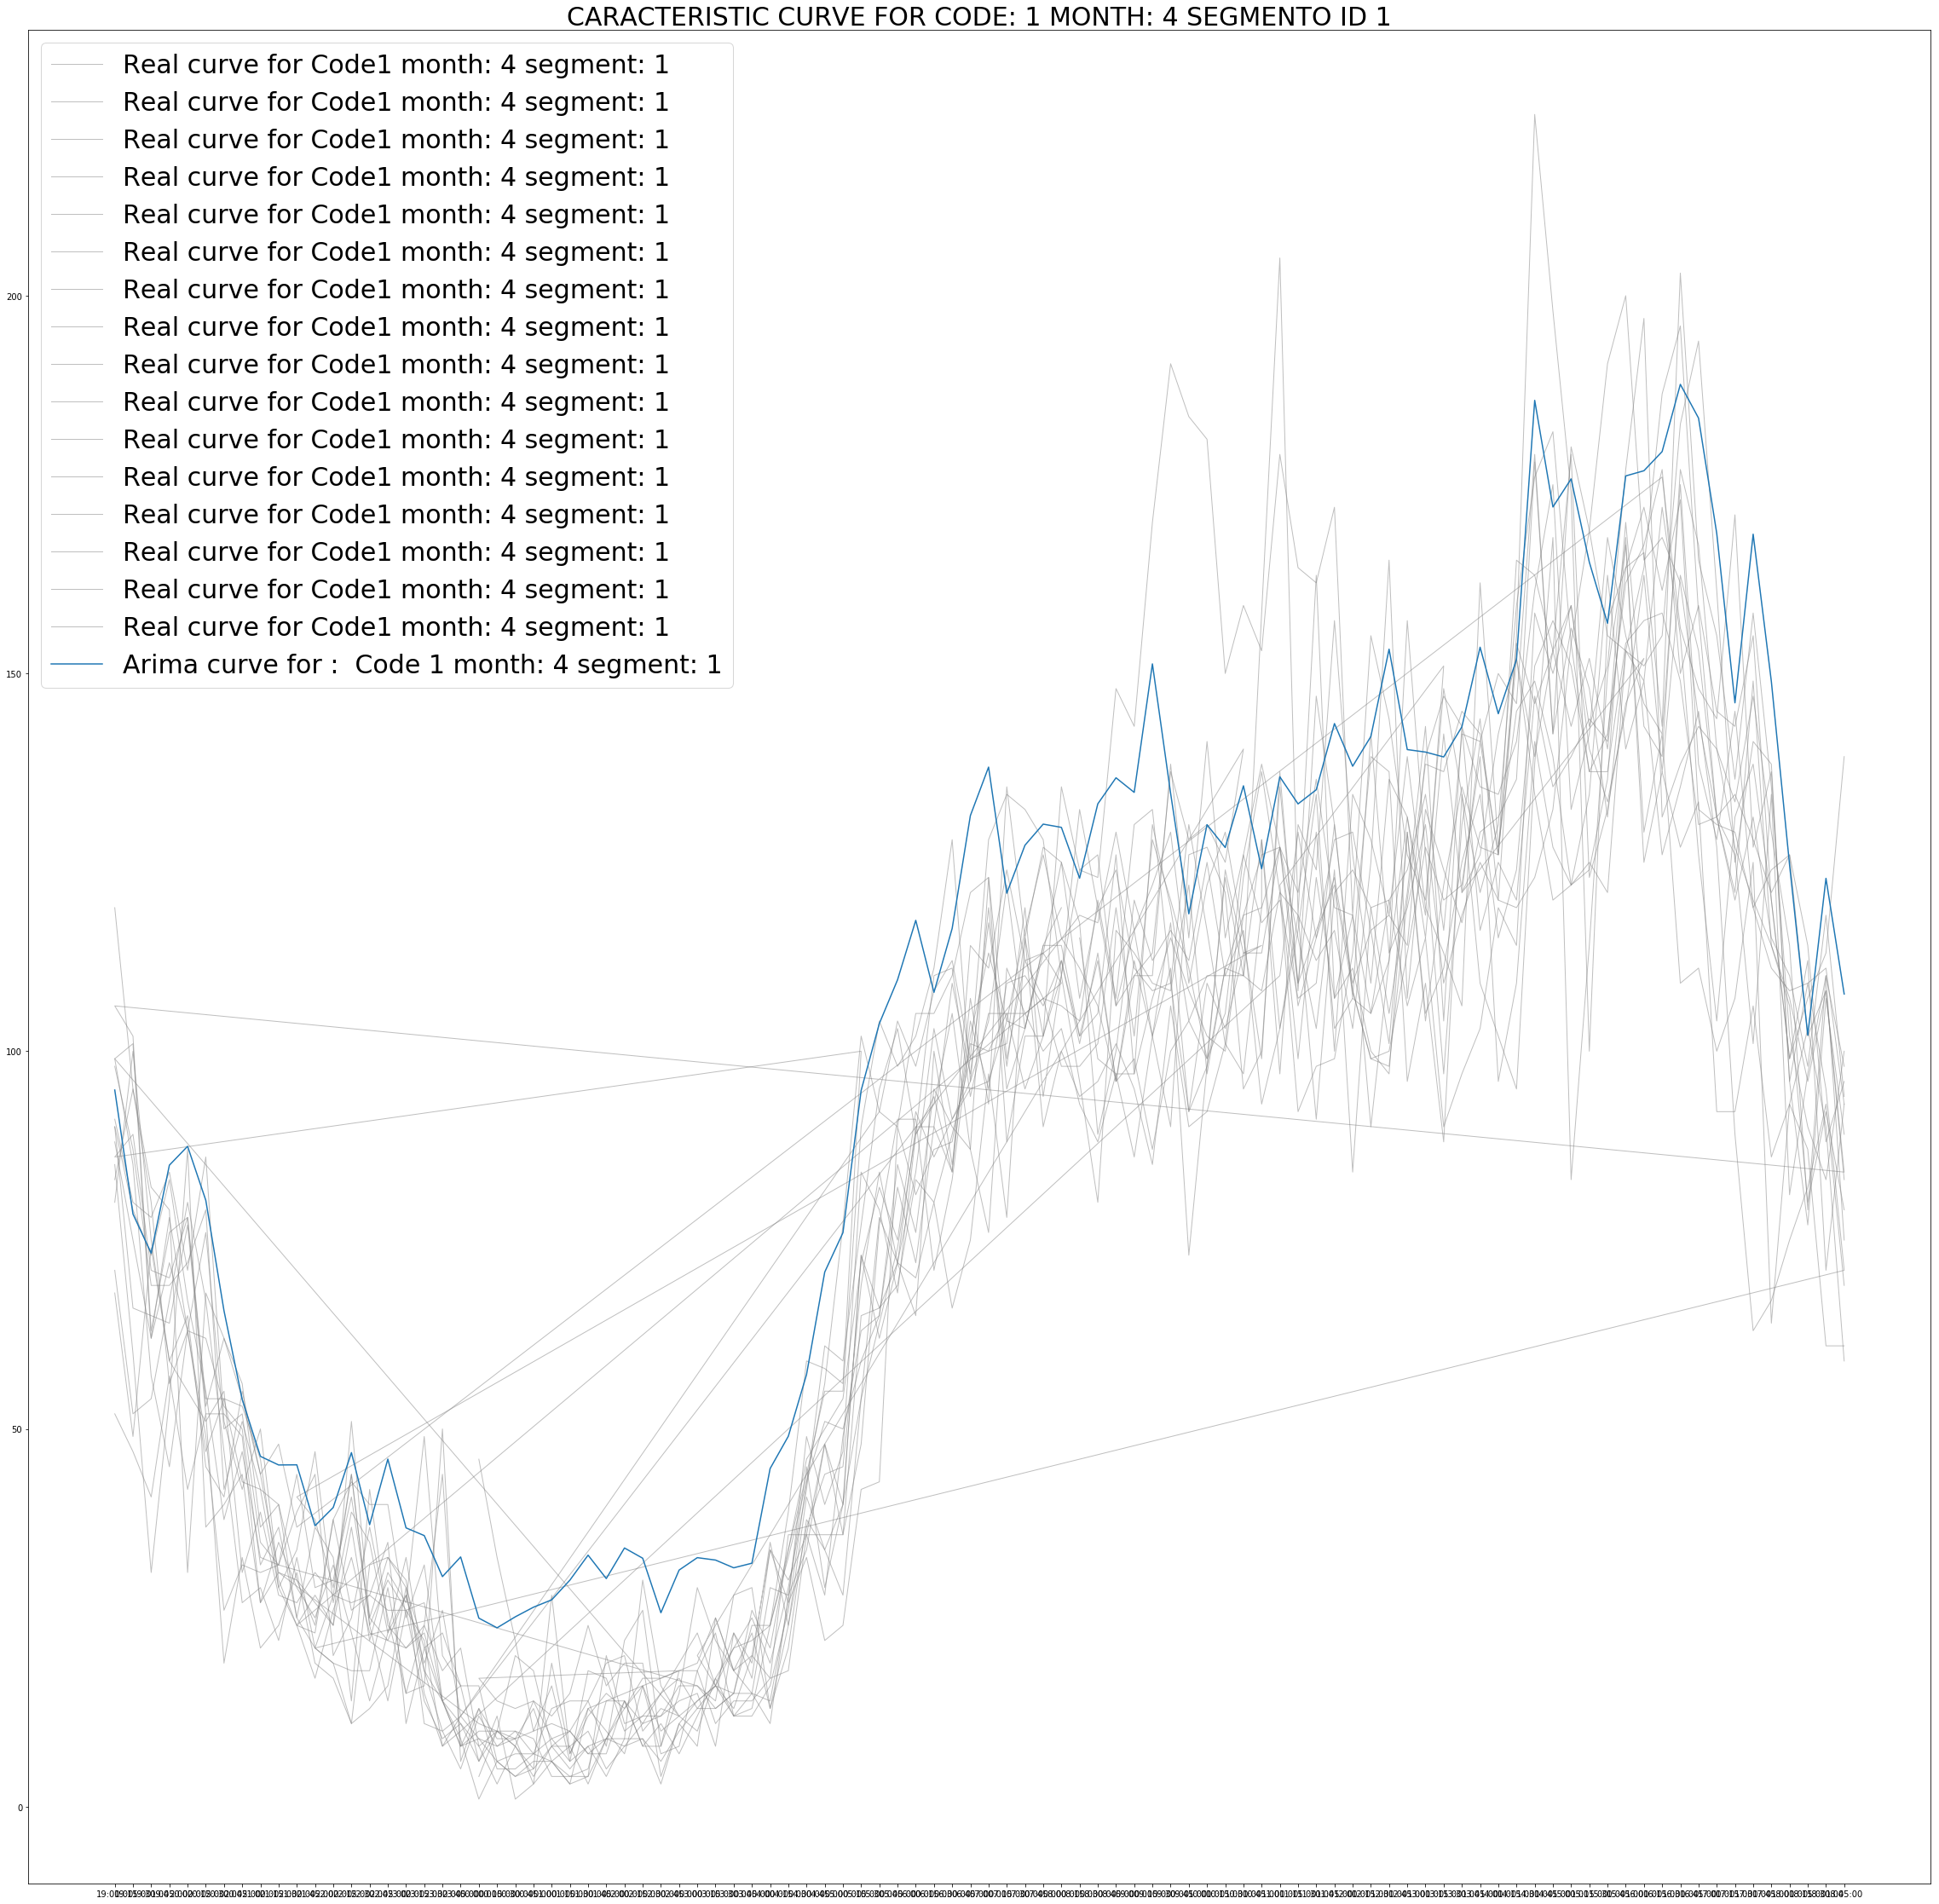

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
plt.title('CARACTERISTIC CURVE FOR CODE: ' + str(code_i) + ' MONTH: ' + str(month_i) + ' SEGMENTO ID ' + str(seg_id) ,  fontsize=30)
step=0
for i in range(0,len(df_train_start.FECHA.dt.day.unique())):
    plt.plot(df_train_start.TIME[step:step+96], df_train_start.TOTAL_VEHICULOS[step:step+96], marker='', label=str("Real curve for Code" + str(code_i) + ' month: ' + str(month_i) + ' segment: ' + str(seg_id)), color='grey', linewidth=1, alpha=0.5)
    step=step+96
plt.plot(df_train_start.TIME[0:96], y_hat_avg, marker='', label='Arima curve for :  Code ' + str(code_i) + ' month: ' + str(month_i) + ' segment: ' + str(seg_id))
plt.legend(loc='best',  fontsize=30)
plt.show()

### EXPONENTIAL SMOOTHING  - Start Test

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing
exp_start= ExponentialSmoothing(np.asarray(df_train_start['TOTAL_VEHICULOS']), seasonal_periods=96, seasonal='add',).fit(smoothing_level=0.5)
y_hat_avg = exp_start.forecast(steps=96)
print(y_hat_avg)

[ 84.97206042  74.52526667  65.5220156   65.0207824   65.14704285
  60.02454774  48.9651038   47.08767175  41.0859727   40.46080676
  37.39457227  34.69978274  40.07317739  43.0029476   38.05898448
  41.73989435  36.24126415  36.60670174  35.22985608  28.78289706
  25.33961006  29.07948943  25.01130897  23.8762717   28.05451113
  24.98431888  27.22550751  28.15625411  29.77939138  32.21664278
  27.96674503  35.22125348  38.03637624  38.72767805  38.10679925
  42.61520143  45.05650409  47.56369719  60.94657073  54.88705507
  60.51947346  74.33207513  85.46128089  84.39914152  86.34935189
  92.85127563  95.11031686  96.98436426 104.79753696 105.41875076
 105.85804564 108.29848398 110.92586883 115.80530165 106.30461173
 111.86709183 110.80268287 115.05201558 116.61810427 111.55566779
 114.74339817 112.49195427 113.80862072 117.55743953 132.24502881
 121.74670882 126.93669964 121.44399518 115.38517993 120.51447175
 120.82946678 123.2696985  126.02252679 118.46328522 127.84447342
 123.66305

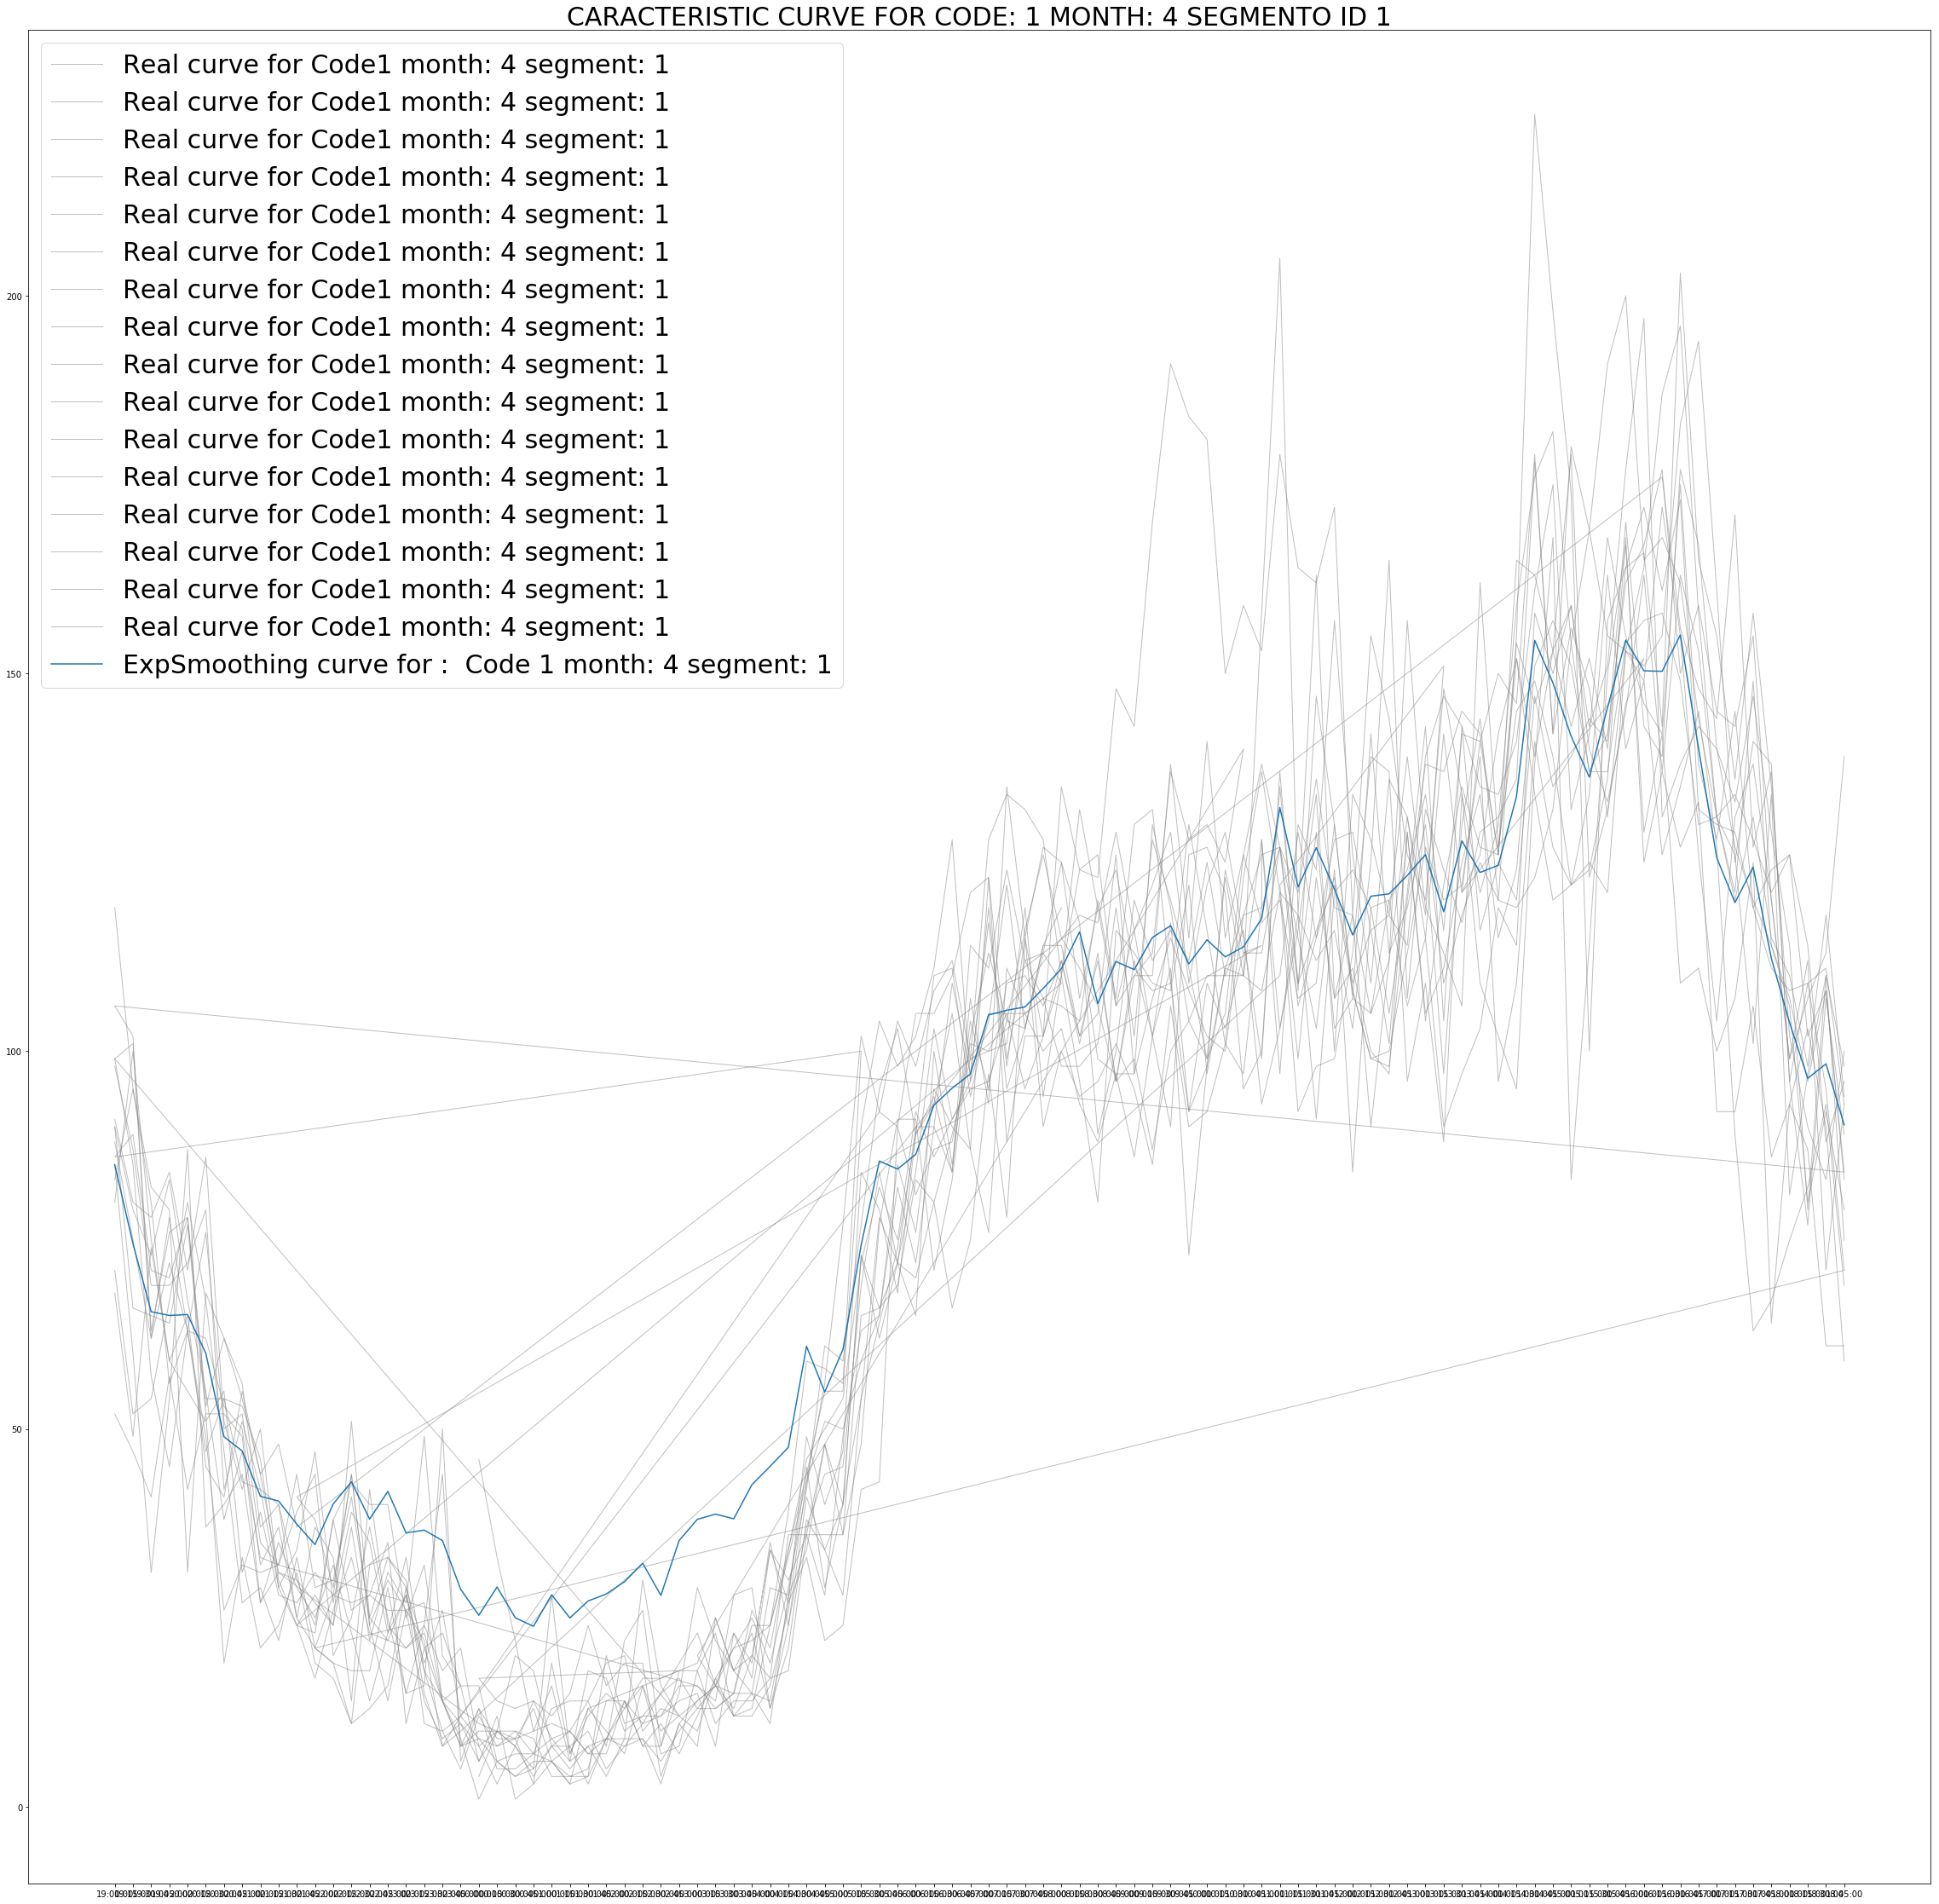

In [29]:
plt.figure(figsize=(40,40))
plt.title('CARACTERISTIC CURVE FOR CODE: ' + str(code_i) + ' MONTH: ' + str(month_i) + ' SEGMENTO ID ' + str(seg_id) ,  fontsize=30)
step=0
for i in range(0,len(df_train_start.FECHA.dt.day.unique())):
    plt.plot(df_train_start.TIME[step:step+96], df_train_start.TOTAL_VEHICULOS[step:step+96], marker='', label=str("Real curve for Code" + str(code_i) + ' month: ' + str(month_i) + ' segment: ' + str(seg_id)), color='grey', linewidth=1, alpha=0.5)
    step=step+96
plt.plot(df_train_start.TIME[0:96], y_hat_avg, marker='', label='ExpSmoothing curve for :  Code ' + str(code_i) + ' month: ' + str(month_i) + ' segment: ' + str(seg_id))
plt.legend(loc='best',  fontsize=30)
plt.show()

### FBPROPHET  - Start Test

In [30]:
# Start taking the training set --> Month 4, Segment 1
month_i = 4
seg_id = 1
code_i = 1
df_train_prophet_start = df_training_sets.loc[(df_training_sets.MES==month_i)&(df_training_sets.ID_SEGMENT==seg_id)]['TRAINING_SET'].iloc[0]
df_train_prophet_start.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 338052 to 405499
Data columns (total 9 columns):
TOTAL_VEHICULOS    192 non-null float64
ID_SEGMENT         192 non-null int64
COD_LABORALIDAD    192 non-null int64
FECHA              192 non-null datetime64[ns]
MES                192 non-null int64
HORA               192 non-null int64
MINUTO             192 non-null int64
CANTIDAD_PREC      192 non-null int64
TIME               192 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 15.0+ KB


In [31]:
from fbprophet import Prophet
df_train_prophet_start = df_train_start[['FECHA','TOTAL_VEHICULOS']].rename(columns={"FECHA": "ds", "TOTAL_VEHICULOS": "y"})
df_train_prophet_start = df_train_prophet_start.reset_index(drop=True)

In [32]:
time_resolution = 60*15 # 60 mint in 1 hour
m = Prophet(changepoint_prior_scale=0.01).fit(df_train_prophet_start)
future = m.make_future_dataframe(periods=time_resolution, freq='H')
fcst = m.predict(future)

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


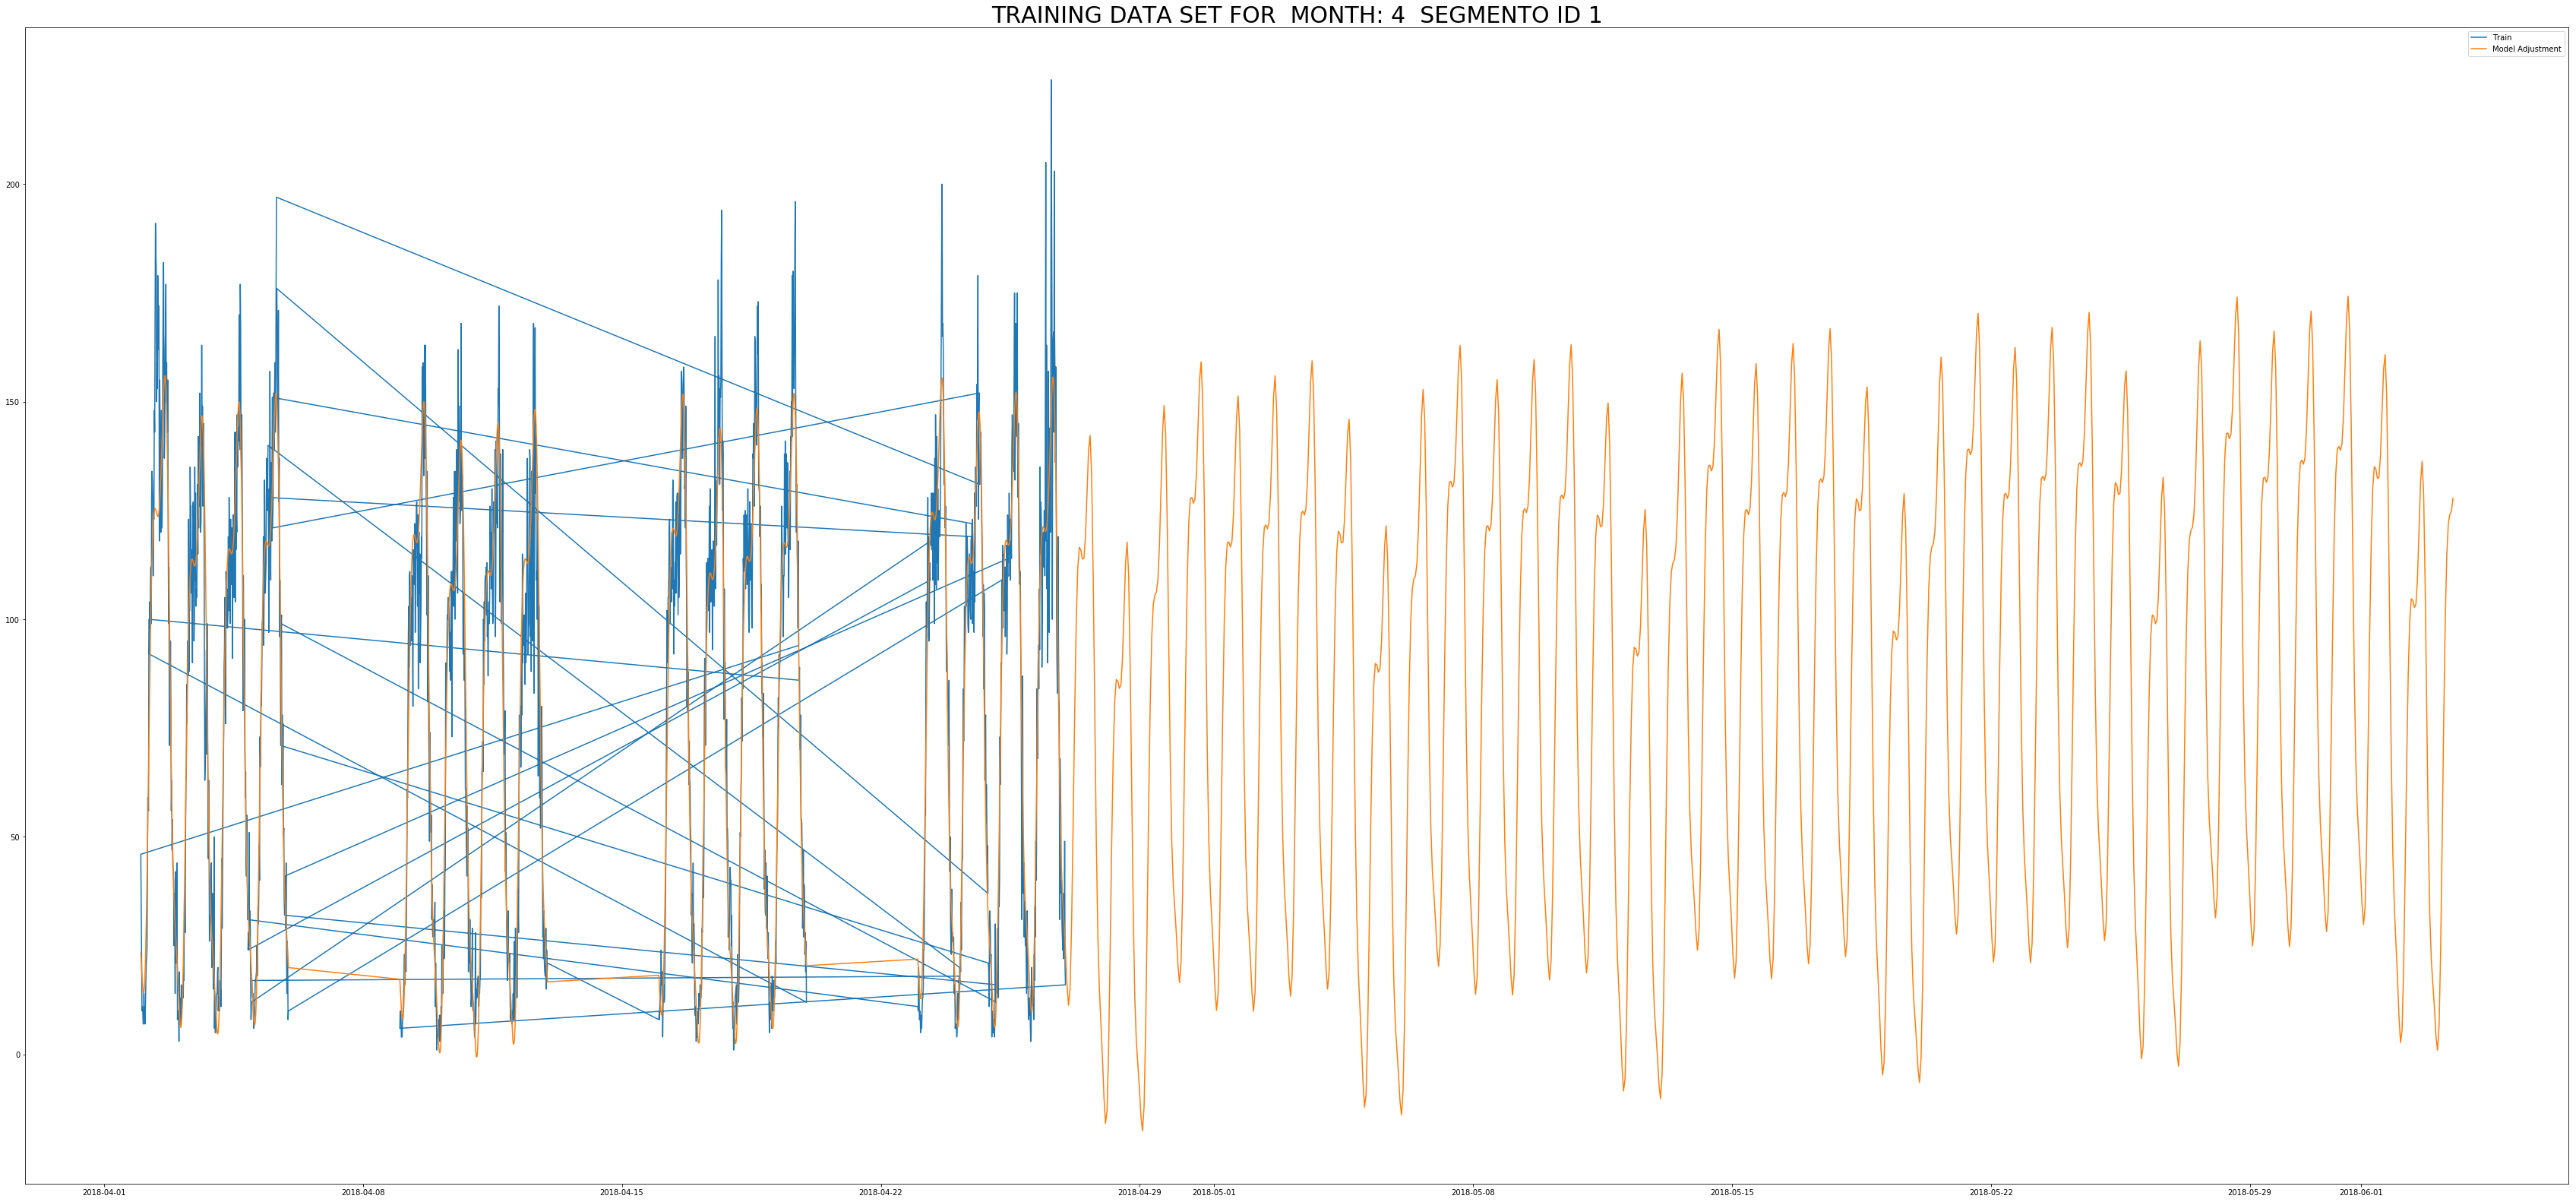

In [33]:
plt.figure(figsize=(60,28))
plt.title('TRAINING DATA SET FOR ' + ' MONTH: 4 '  + ' SEGMENTO ID ' + str(seg_id) ,  fontsize=30)
plt.plot(df_train_prophet_start.ds, df_train_prophet_start.y, marker='', label=str("Train"))
plt.plot(fcst.ds, fcst.yhat, marker='', label=str("Model Adjustment"))
plt.legend(loc='best',  fontsize=10)
plt.show()

### TBATS - Start Test

In [35]:
from tbats import TBATS, BATS
tbats_start = TBATS(seasonal_periods=(1, 96)).fit(df_train_start.TOTAL_VEHICULOS)
y_hat_avg = tbats_start.forecast(steps=96)
print(y_hat_avg)

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)


[ 81.79440837  74.15744887  66.40660347  58.76670479  51.54738593
  45.07103029  39.60202539  35.29725611  32.18654103  30.17815042
  29.07715357  28.60770581  28.4402594   28.23075787  27.67438671
  26.56453873  24.83787305  22.58649619  20.02935022  17.4513101
  15.13180554  13.28800904  12.04870056  11.45821707  11.49528106
  12.08923364  13.12784601  14.46512269  15.94074016  17.41350105
  18.79926054  20.09875436  21.40493285  22.88863827  24.76927675
  27.27909245  30.62617922  34.95727557  40.32163676  46.64215735
  53.70458467  61.17469905  68.64550669  75.70545071  82.01005189
  87.33741498  91.61339406  94.9022656   97.36919157  99.22774738
 100.68759656 101.91462985 103.01059569 104.013542   104.91556501
 105.69091162 106.32563841 106.84010773 107.29780281 107.79789721
 108.4536182  109.36229742 110.57511021 112.07467315 113.76727516
 115.49392644 117.06067901 118.28391352 119.0413337  119.31600328
 119.22081025 118.99503493 118.97200155 119.52418886 120.99664843
 123.639950

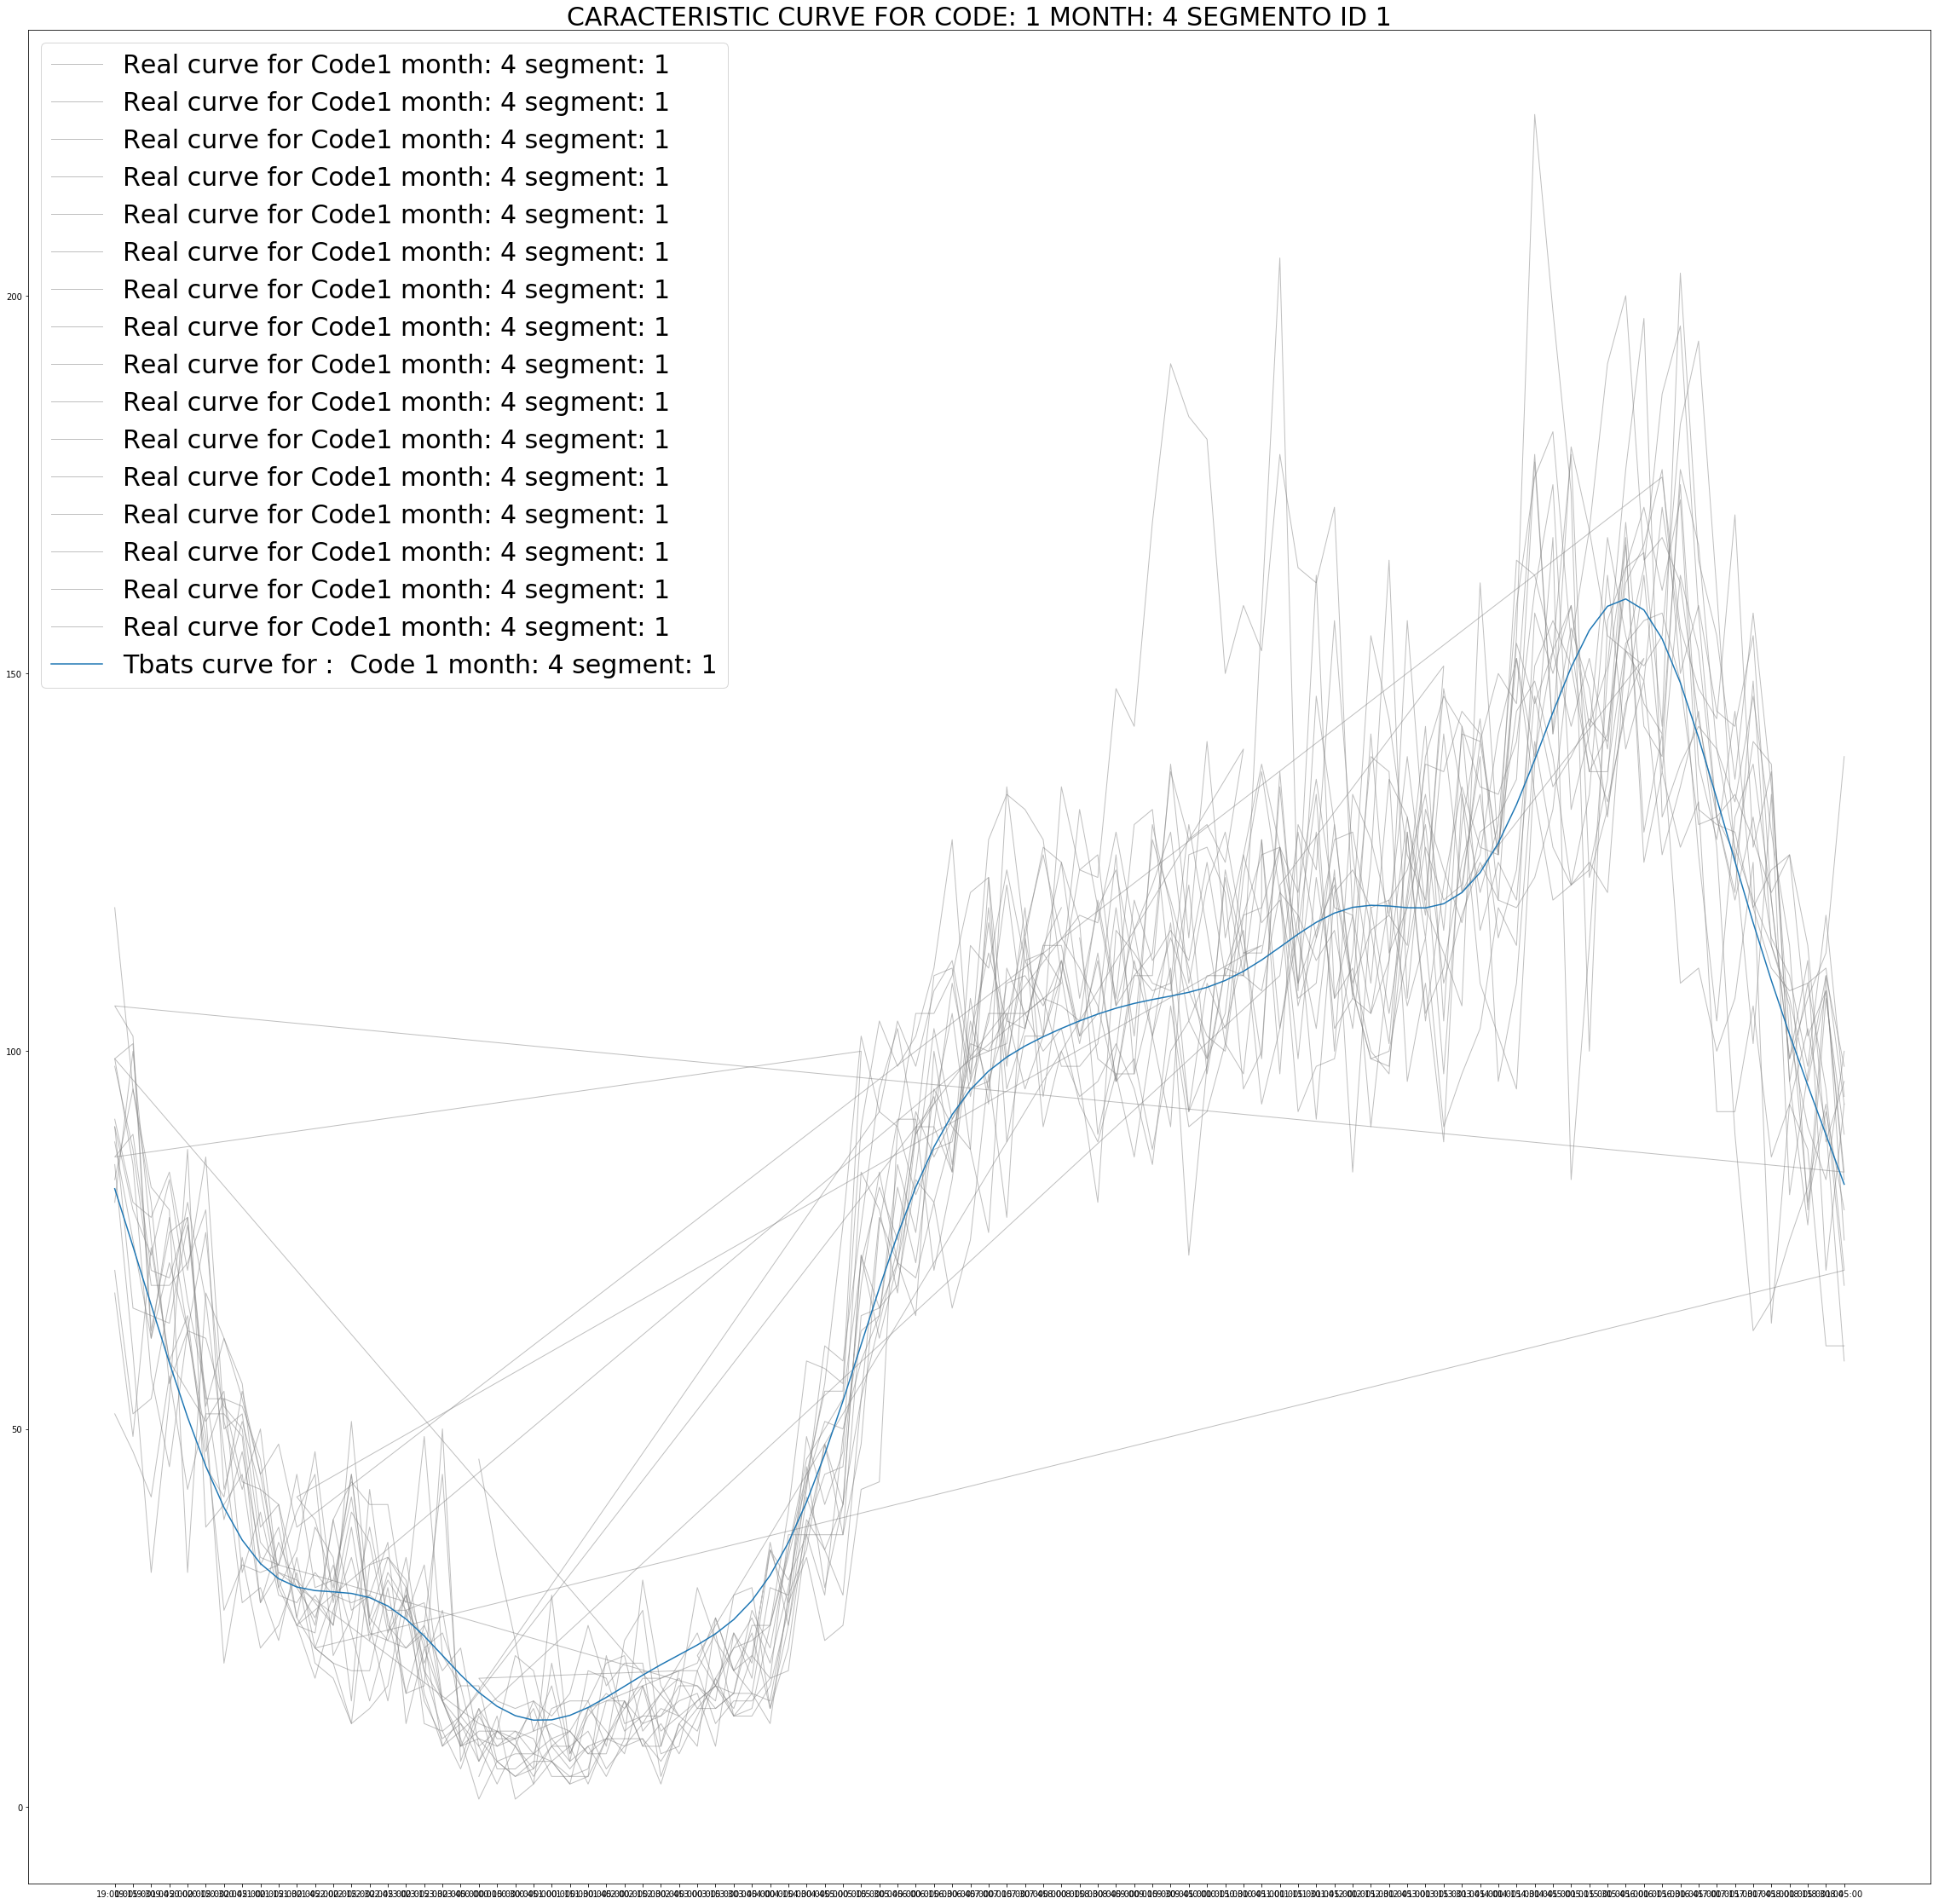

In [36]:
plt.figure(figsize=(40,40))
plt.title('CARACTERISTIC CURVE FOR CODE: ' + str(code_i) + ' MONTH: ' + str(month_i) + ' SEGMENTO ID ' + str(seg_id) ,  fontsize=30)
step=0
for i in range(0,len(df_train_start.FECHA.dt.day.unique())):
    plt.plot(df_train_start.TIME[step:step+96], df_train_start.TOTAL_VEHICULOS[step:step+96], marker='', label=str("Real curve for Code" + str(code_i) + ' month: ' + str(month_i) + ' segment: ' + str(seg_id)), color='grey', linewidth=1, alpha=0.5)
    step=step+96
plt.plot(df_train_start.TIME[0:96], y_hat_avg, marker='', label='Tbats curve for :  Code ' + str(code_i) + ' month: ' + str(month_i) + ' segment: ' + str(seg_id))
plt.legend(loc='best',  fontsize=30)
plt.show()

### ---------------------------------------------------
### START FINAL MODEL TRAINING
### ---------------------------------------------------

### Generate model_data.csv with the generalized curve extracted with each model

Estructura de model_data.csv

- MODELO: Modelo con el que se ha calculado la curva patron REF_ARIMA .... X (Model)
- ID_SEGMENT: Segmento id para el que se ha calculado el modelo
- MES: Mes para el que se ha calculado el modelo
- COD_LABORALIDAD: Codigo de laboralidad para el cual se ha calculado el modelo
- TIME: El timestamp con formato HH:MM:SS (diario)
- TOTAL_VEHICULOS: Valor asociado a un time dentro del dia patron con cod_laboralidad X, segmento Y, mes Z

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## SARIMAX

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

In [57]:
sarimax_model_data_dict = {'TIME':[], 'ID_SEGMENT':[], 'MES':[], 'COD_LABORALIDAD': [], 'TOTAL_VEHICULOS': []}

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pickle
from importlib import reload  
import logging
reload(logging)

MODEL_NAME =  'Sarimax'

#segments=[1]
months=[6,7,8,9,10,11,12,1,2,3,4,5]#,4,5,6]
#codes=[2]

processed_segs=[]
processed_months=[]
processed_codes=[]

skipped_models = []
store_model = True

save_iter=0
reach_checkpoint=1
i_part=0

save_dir = os.path.join(os.getcwd(), MODEL_NAME)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
logfile = os.path.join(save_dir, MODEL_NAME + ".log")
logging.basicConfig(level=logging.DEBUG, filename=os.path.join(save_dir, logfile), filemode="a+", format="%(asctime)-15s %(levelname)-8s %(message)s")
logging.info(MODEL_NAME +  " MODEL GENERATION")
    

for month_i in df_training_sets['MES'].unique(): # Months 
    index_values=None
    training_values=None
    y_hat_avg=None
    exp_fit1=None
    df_train=None
    
    # update iterations
    save_iter=save_iter+1
        
    for seg_id in df_training_sets['ID_SEGMENT'].unique(): # Segment
        df_train_seg_month = df_training_sets.loc[(df_training_sets.MES==month_i)&(df_training_sets.ID_SEGMENT==seg_id)]
        for code_i in df_train_seg_month['COD_LABORALIDAD'].unique(): # All codes present
            df_train = df_train_seg_month.loc[(df_train_seg_month.COD_LABORALIDAD==code_i)]['TRAINING_SET'].iloc[0]

            # Training cleaning
            df_train.drop_duplicates(subset=['FECHA', 'TOTAL_VEHICULOS'], keep='first', inplace=True)
            
            # Train sarimax smoothing models
            training_values = df_train.TOTAL_VEHICULOS
            
            try:
                logging.info("Generating model for: " + "SEG: " + str(seg_id) + " MONTH: " + str(month_i) + " CODE " + str(code_i))
                arima_fit = sm.tsa.statespace.SARIMAX(np.asarray(training_values), trend='ct', order=(1, 1, 1), seasonal_order=(1, 1, 0, 96), enforce_stationarity=False, enforce_invertibility=False).fit()
                y_hat_avg = arima_fit.forecast(steps=96)
                
                if store_model:
                    logging.info("Model succesfully generated! Saving it...") 
                    filename = os.path.join(MODEL_NAME, str(i_part) + "_" + MODEL_NAME + ".sav")
                    pickle.dump(arima_fit, open(filename, 'wb'))

            except Exception as e:
                logging.error(str(e))
                logging.error("Not possible to generate model for: " + "SEG: " + str(seg_id) + " MONTH: " + str(month_i) + " CODE " + str(code_i))
                skipped_models.append([{'seg_id': seg_id, 'month_i': month_i, 'code_i': code_i}])
                continue # don't generate this model and continue in the loop
                
            
            # Fill model_data_dict with the model curve
            sarimax_model_data_dict['ID_SEGMENT'].extend([int(seg_id)]*96)
            sarimax_model_data_dict['MES'].extend([int(month_i)]*96)
            sarimax_model_data_dict['COD_LABORALIDAD'].extend([int(code_i)]*96)
            sarimax_model_data_dict['TIME'].extend(df_train.TIME[0:96])
            sarimax_model_data_dict['TOTAL_VEHICULOS'].extend(y_hat_avg.astype(int))
            
            # checkpoint info
            processed_segs.append(int(seg_id))
            processed_months.append(int(month_i))
            processed_codes.append(int(code_i))
            
            arima_fit=None

    if save_iter >= reach_checkpoint:
        df_sarimax_model = pd.DataFrame(sarimax_model_data_dict)
        
        df_sarimax_model.to_csv(os.path.join(MODEL_NAME, str(i_part) + "_" + MODEL_NAME + ".csv"), sep=";", index=False)

        logging.info("Saving results.... File part: "+ str(i_part)  )
        logging.debug("Processed segments: " +  str(set(processed_segs)))
        logging.debug("Processed months: " +  str(set(processed_months)))
        logging.debug("Processed codes: " +  str(set(processed_codes)))
        logging.debug("Skipped models: " + str(skipped_models))
        
        processed_codes=[]
        i_part=i_part+1

        # clean variables
        df_sarimax_model = None
        save_iter=0
        sarimax_model_data_dict = {'TIME':[], 'ID_SEGMENT':[], 'MES':[], 'COD_LABORALIDAD': [], 'TOTAL_VEHICULOS': []}

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\yhoz\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:508: ConvergenceWa

KeyboardInterrupt: 

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## EXPONENTIAL SMOOTHING

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
exp_model_data_dict = {'TIME':[], 'ID_SEGMENT':[], 'MES':[], 'COD_LABORALIDAD': [], 'TOTAL_VEHICULOS': []}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os 
from importlib import reload  
import logging
reload(logging)

MODEL_NAME =  'ExpSmoothing'

segments=[1]
months=[6,7,8,9,10,11,12,1,2,3,4,5]#,4,5,6]
codes=[2]

processed_segs=[]
processed_months=[]
processed_codes=[]

skipped_models = []
store_model = True

save_iter=0
reach_checkpoint=1
i_part=0

save_dir = os.path.join(os.getcwd(), MODEL_NAME)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
logfile = os.path.join(save_dir, MODEL_NAME + ".log")

logging.basicConfig(level=logging.DEBUG, filename=os.path.join(save_dir, logfile), filemode="a+", format="%(asctime)-15s %(levelname)-8s %(message)s")
logging.info(MODEL_NAME +  " MODEL GENERATION")
    
for month_i in df_training_sets['MES'].unique(): # Months 
    index_values=None
    training_values=None
    y_hat_avg=None
    exp_fit=None
    df_train=None
    
    # update iterations
    save_iter=save_iter+1
        
    for seg_id in segments:# df_training_sets['ID_SEGMENT'].unique(): # Segment
        df_train_seg_month = df_training_sets.loc[(df_training_sets.MES==month_i)&(df_training_sets.ID_SEGMENT==seg_id)]
        for code_i in codes:#df_train_seg_month['COD_LABORALIDAD'].unique(): # All codes present
            df_train = df_train_seg_month.loc[(df_train_seg_month.COD_LABORALIDAD==code_i)]['TRAINING_SET'].iloc[0]

            # Training cleaning
            df_train.drop_duplicates(subset=['FECHA', 'TOTAL_VEHICULOS'], keep='first', inplace=True)
            
            # Train exponential smoothing models
            training_values = df_train.TOTAL_VEHICULOS
            try:
                logging.info("Generating model for: " + "SEG: " + str(seg_id) + " MONTH: " + str(month_i) + " CODE " + str(code_i))
                exp_fit = ExponentialSmoothing(np.asarray(training_values), seasonal_periods=96, seasonal='add',).fit(smoothing_level=0.5)
                y_hat_avg = exp_fit.forecast(steps=96)
                
                if store_model:
                    logging.info("Model succesfully generated! Saving it...") 
                    filename = os.path.join(MODEL_NAME, str(i_part) + "_" + MODEL_NAME + ".sav")
                    pickle.dump(exp_fit, open(filename, 'wb'))
                    
            except Exception as e:
                logging.error(str(e))
                logging.error("Not possible to generate model for: " + "SEG: " + str(seg_id) + " MONTH: " + str(month_i) + " CODE " + str(code_i))
                skipped_models.append([{'seg_id': seg_id, 'month_i': month_i, 'code_i': code_i}])
                continue # don't generate this model and continue in the loop
            
            # Fill model_data_dict with the model curve
            exp_model_data_dict['ID_SEGMENT'].extend([int(seg_id)]*96)
            exp_model_data_dict['MES'].extend([int(month_i)]*96)
            exp_model_data_dict['COD_LABORALIDAD'].extend([int(code_i)]*96)
            exp_model_data_dict['TIME'].extend(df_train.TIME[0:96])
            exp_model_data_dict['TOTAL_VEHICULOS'].extend(y_hat_avg.astype(int))
            
            # checkpoint info
            processed_segs.append(int(seg_id))
            processed_months.append(int(month_i))
            processed_codes.append(int(code_i))
            
            exp_fit=None

    if save_iter >= reach_checkpoint:
        df_exp_model = pd.DataFrame(exp_model_data_dict)
        
        df_exp_model.to_csv(os.path.join(MODEL_NAME, str(i_part) + "_" + MODEL_NAME + ".csv"), sep=";", index=False)

        logging.info("Saving results.... File part: "+ str(i_part)  )
        logging.debug("Processed segments: " +  str(set(processed_segs)))
        logging.debug("Processed months: " +  str(set(processed_months)))
        logging.debug("Processed codes: " +  str(set(processed_codes)))
        logging.debug("Skipped models: " + str(skipped_models))
        
        processed_codes=[]
        i_part=i_part+1

        # clean variables
        df_exp_model = None
        save_iter=0
        exp_model_data_dict = {'TIME':[], 'ID_SEGMENT':[], 'MES':[], 'COD_LABORALIDAD': [], 'TOTAL_VEHICULOS': []}

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## FBPROPHET

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

In [59]:
fb_model_data_dict = {'MINUTE':[], 'HOUR':[], 'ID_SEGMENT':[], 'MES':[], 'DAY':[], 'TOTAL_VEHICULOS': []}

In [60]:
import matplotlib.pyplot as plt
import numpy as np
MODEL_NAME =  'fbprophet'
from importlib import reload  
import logging
reload(logging)

#segments=[1]
months=[3]#,4,5,6]
#codes=[2]

processed_segs=[]
processed_months=[]
processed_codes=[]

skipped_models = []
store_model = True

save_iter=0
reach_checkpoint=1
i_part=0

save_dir = os.path.join(os.getcwd(), MODEL_NAME)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
logfile = os.path.join(save_dir, MODEL_NAME + ".log")

logging.basicConfig(level=logging.DEBUG, filename=os.path.join(save_dir, logfile), filemode="a+", format="%(asctime)-15s %(levelname)-8s %(message)s")
logging.info(MODEL_NAME +  " MODEL GENERATION")
    
for month_i in df_training_sets['MES'].unique(): # Months 
    # clean variables
    fcst=None
    future=None
    df_train=None
    fbprophet_ref=None
    
    # update iterations
    save_iter=save_iter+1
            
    for seg_id in df_training_sets['ID_SEGMENT'].unique(): # Segment
            df_train = df_training_sets.loc[(df_training_sets.MES==int(month_i))&(df_training_sets.ID_SEGMENT==int(seg_id))]['TRAINING_SET'].iloc[0]
            
            # training transformation 
            df_training_prophet = df_train[['FECHA','TOTAL_VEHICULOS']].rename(columns={"FECHA": "ds", "TOTAL_VEHICULOS": "y"})
            df_training_prophet = df_training_prophet.reset_index(drop=True)
            df_training_prophet.drop_duplicates(subset=['ds', 'y'], keep='first', inplace=True)
            
            # Train fbprophet model
            time_resolution = 60*15 # 60 mint in 1 hour
            try:
                logging.info("Generating model for: " + "SEG: " + str(seg_id) + " MONTH: " + str(month_i))
                m = Prophet(changepoint_prior_scale=0.01).fit(df_training_prophet)
                future = m.make_future_dataframe(periods=time_resolution, freq='H')
                fcst = m.predict(future)
                
                if store_model:
                    logging.info("Model succesfully generated! Saving it...") 
                    filename = os.path.join(MODEL_NAME, str(i_part) + "_" + MODEL_NAME + ".sav")
                    pickle.dump(m, open(filename, 'wb'))
                     
            except Exception as e:
                logging.error(str(e))
                logging.error("Not possible to generate model for: " + "SEG: " + str(seg_id) + " MONTH: " + str(month_i))
                skipped_models.append([{'seg_id': seg_id, 'month_i': month_i}])
                continue # don't generate this model and continue in the loop
            
            # Take the modelled month
            fbprophet_ref=fcst.loc[fcst.ds.dt.month==month_i]
            
            # Fill model_data_dict with the model curve
            fb_model_data_dict['ID_SEGMENT'].extend([int(seg_id)]*len(fbprophet_ref.ds.values))
            fb_model_data_dict['MES'].extend(fbprophet_ref.ds.dt.month)
            fb_model_data_dict['DAY'].extend(fbprophet_ref.ds.dt.day)
            fb_model_data_dict['HOUR'].extend(fbprophet_ref.ds.dt.hour)
            fb_model_data_dict['MINUTE'].extend(fbprophet_ref.ds.dt.minute)
            fb_model_data_dict['TOTAL_VEHICULOS'].extend(fbprophet_ref.yhat.astype(int))
    
            # store checkpoint info (for saving the results)
            processed_segs.append(int(seg_id))
            processed_months.append(int(month_i))
    
    if save_iter >= reach_checkpoint:
        df_fb_model = pd.DataFrame(fb_model_data_dict)
    
        df_fb_model.to_csv(os.path.join(MODEL_NAME, str(i_part) + "_" + MODEL_NAME + ".csv"), sep=";", index=False)

        logging.info("Saving results.... File part: "+ str(i_part)  )
        logging.debug("Processed segments: " +  str(set(processed_segs)))
        logging.debug("Processed months: " +  str(set(processed_months)))
        logging.debug("Skipped models: " + str(skipped_models))
        
        i_part=i_part+1

        # clean variables
        df_fb_model = None
        save_iter=0
        fb_model_data_dict = {'MINUTE':[], 'HOUR':[], 'ID_SEGMENT':[], 'MES':[], 'DAY':[], 'TOTAL_VEHICULOS': []}

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbpro

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_sea

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_s

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## TBATS 

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

In [55]:
tbats_model_data_dict = {'TIME':[], 'ID_SEGMENT':[], 'MES':[], 'COD_LABORALIDAD': [], 'TOTAL_VEHICULOS': []}

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import os 
from importlib import reload  
import logging
reload(logging)

MODEL_NAME =  'Tbats'

#segments=[1]
months=[6,7,8,9,10,11,12,1,2,3,4,5]#,4,5,6]
#codes=[2]

processed_segs=[]
processed_months=[]
processed_codes=[]

skipped_models = []
store_model = True

save_iter=0
reach_checkpoint=1
i_part=0

save_dir = os.path.join(os.getcwd(), MODEL_NAME)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
logfile = os.path.join(save_dir, MODEL_NAME + ".log")

logging.basicConfig(level=logging.DEBUG, filename=os.path.join(save_dir, logfile), filemode="a+", format="%(asctime)-15s %(levelname)-8s %(message)s")
logging.info(MODEL_NAME +  " MODEL GENERATION")
    
for month_i in df_training_sets['MES'].unique(): # Months 
    index_values=None
    training_values=None
    y_hat_avg=None
    tbats_fit=None
    df_train=None
    
    # update iterations
    save_iter=save_iter+1
        
    for seg_id in df_training_sets['ID_SEGMENT'].unique(): # Segment
        df_train_seg_month = df_training_sets.loc[(df_training_sets.MES==month_i)&(df_training_sets.ID_SEGMENT==seg_id)]
        for code_i in df_train_seg_month['COD_LABORALIDAD'].unique(): # All codes present
            df_train = df_train_seg_month.loc[(df_train_seg_month.COD_LABORALIDAD==code_i)]['TRAINING_SET'].iloc[0]

            # Training cleaning
            df_train.drop_duplicates(subset=['FECHA', 'TOTAL_VEHICULOS'], keep='first', inplace=True)
            
            # Train tbats models
            training_values = df_train.TOTAL_VEHICULOS
            
            try:
                logging.info("Generating model for: " + "SEG: " + str(seg_id) + " MONTH: " + str(month_i) + " CODE " + str(code_i))
                tbats_fit = TBATS(seasonal_periods=(1, 96)).fit(training_values)
                y_hat_avg = tbats_fit.forecast(steps=96)
                
                if store_model:
                    logging.info("Model succesfully generated! Saving it...") 
                    filename = os.path.join(MODEL_NAME, str(i_part) + "_" + MODEL_NAME + ".sav")
                    pickle.dump(tbats_fit, open(filename, 'wb'))
                    
            except Exception as e:
                logging.error(str(e))
                logging.error("Not possible to generate model for: " + "SEG: " + str(seg_id) + " MONTH: " + str(month_i) + " CODE " + str(code_i))
                skipped_models.append([{'seg_id': seg_id, 'month_i': month_i, 'code_i': code_i}])
                continue # don't generate this model and continue in the loop
            
            # Fill model_data_dict with the model curve
            tbats_model_data_dict['ID_SEGMENT'].extend([int(seg_id)]*96)
            tbats_model_data_dict['MES'].extend([int(month_i)]*96)
            tbats_model_data_dict['COD_LABORALIDAD'].extend([int(code_i)]*96)
            tbats_model_data_dict['TIME'].extend(df_train.TIME[0:96])
            tbats_model_data_dict['TOTAL_VEHICULOS'].extend(y_hat_avg.astype(int))
            
            # checkpoint info
            processed_segs.append(int(seg_id))
            processed_months.append(int(month_i))
            processed_codes.append(int(code_i))
            
            tbats_fit=None

    if save_iter >= reach_checkpoint:
        df_tbats_model = pd.DataFrame(tbats_model_data_dict)
    
        df_tbats_model.to_csv(os.path.join(MODEL_NAME, str(i_part) + "_" + MODEL_NAME + ".csv"), sep=";", index=False)

        logging.info("Saving results.... File part: "+ str(i_part)  )
        logging.debug("Processed segments: " +  str(set(processed_segs)))
        logging.debug("Processed months: " +  str(set(processed_months)))
        logging.debug("Processed codes: " +  str(set(processed_codes)))
        logging.debug("Skipped models: " + str(skipped_models))
        
        processed_codes=[]
        i_part=i_part+1

        # clean variables
        df_tbats_model = None
        save_iter=0
        tbats_model_data_dict = {'TIME':[], 'ID_SEGMENT':[], 'MES':[], 'COD_LABORALIDAD': [], 'TOTAL_VEHICULOS': []}

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: ModelWarning: Optimization did not converge. Forecasts may be unstable.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values greater than 1. Ignoring all seasonal period values that do not meet this condition.
  warnings.warn(message, warning_type)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: All seasonal periods should be values 